In [1]:
import os
import numpy as np
from tqdm import tqdm
import copy
import matplotlib
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from loader import load, SOURCES,\
    HOPPER_EXPERT_SCORE, HOPPER_RANDOM_SCORE,\
    HALFCHEETAH_EXPERT_SCORE, HALFCHEETAH_RANDOM_SCORE,\
    WALKER_EXPERT_SCORE, WALKER_RANDOM_SCORE

In [2]:

def get_returns(rewards, not_dones):
    returns, ep_return = list(), 0

    for i, not_done in enumerate(not_dones):
        ep_return += rewards[i].item()
        if not not_done:
            returns.append(ep_return)
            ep_return = 0

    return returns

In [3]:
np.random.seed(42)
ind = np.arange(0, 100_000)

limits = []

dstype, tqs, sacos, performances = [], [], [], {}

with open("results.csv", "r") as f:
    for l, line in enumerate(f):
        if l == 0: continue
        splits = line.split(";")
        performances[splits[0]] = [float(s) for s in splits[1:]]

for s, (name, link) in enumerate(SOURCES.items()):

    states, actions, rewards, not_dones = load(name, link)

    print(name)

    if "replay" in name:
        dstype.append("*")
    elif "random" in name:
        dstype.append("o")
    elif "medium" in name:
        dstype.append("P")
    elif "expert" in name:
        dstype.append("s")

    d_return = np.mean(get_returns(rewards, not_dones))
    if "hopper" in name:
        tq = (d_return - HOPPER_RANDOM_SCORE) / (HOPPER_EXPERT_SCORE - HOPPER_RANDOM_SCORE)
    elif "halfcheetah" in name:
        tq = (d_return - HALFCHEETAH_RANDOM_SCORE) / (HALFCHEETAH_EXPERT_SCORE - HALFCHEETAH_RANDOM_SCORE)
    elif "walker" in name:
        tq = (d_return - WALKER_RANDOM_SCORE) / (WALKER_EXPERT_SCORE - WALKER_RANDOM_SCORE)
    tqs.append(tq)

    pairs = np.concatenate((states, actions), axis=1)[ind]

    if s < 3:
        limits_ = []
        for axis in range(len(pairs[0])):
            limits_.append((np.min(pairs[:, axis]), np.max(pairs[:, axis])))
        limits.append(limits_)

    for axis in range(len(pairs[0])):
        axmin, axmax = limits[s % 3][axis]

        pairs[:, axis] = np.digitize(pairs[:, axis], np.linspace(axmin, axmax, num=5))
    pairs.astype(int)

    unique = set()
    for state in tqdm(pairs,
                      desc=f"Search for Unique States in whole dataset {name}",
                      total=len(pairs)):
        unique.add(",".join([str(s) for s in state]))
    sacos.append(len(unique))

sacos_ = copy.copy(sacos)
for i in range(3):
    for j in range(4):
        sacos_[i + j * 3] = sacos[i + j * 3] / sacos[i]

print(dstype)
print(tqs)
print(sacos)
print(sacos_)

load datafile: 100%|██████████| 5/5 [00:00<00:00, 79.37it/s]


halfcheetah-medium-replay-v0


Search for Unique States in whole dataset halfcheetah-medium-replay-v0: 100%|██████████| 100000/100000 [00:00<00:00, 127225.92it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00, 92.58it/s]


walker2d-medium-replay-v0


Search for Unique States in whole dataset walker2d-medium-replay-v0: 100%|██████████| 100000/100000 [00:00<00:00, 135265.40it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00, 71.42it/s]


hopper-medium-replay-v0


Search for Unique States in whole dataset hopper-medium-replay-v0: 100%|██████████| 100000/100000 [00:00<00:00, 187970.07it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00,  9.52it/s]


halfcheetah-random-v0


Search for Unique States in whole dataset halfcheetah-random-v0: 100%|██████████| 100000/100000 [00:00<00:00, 134228.29it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00,  8.93it/s]


walker2d-random-v0


Search for Unique States in whole dataset walker2d-random-v0: 100%|██████████| 100000/100000 [00:00<00:00, 135136.96it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00, 15.24it/s]


hopper-random-v0


Search for Unique States in whole dataset hopper-random-v0: 100%|██████████| 100000/100000 [00:00<00:00, 184843.49it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00,  9.19it/s]


halfcheetah-medium-v0


Search for Unique States in whole dataset halfcheetah-medium-v0: 100%|██████████| 100000/100000 [00:00<00:00, 134878.35it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00,  9.62it/s]


walker2d-medium-v0


Search for Unique States in whole dataset walker2d-medium-v0: 100%|██████████| 100000/100000 [00:00<00:00, 131404.37it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00, 14.97it/s]


hopper-medium-v0


Search for Unique States in whole dataset hopper-medium-v0: 100%|██████████| 100000/100000 [00:00<00:00, 205362.74it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00,  9.36it/s]


halfcheetah-expert-v0


Search for Unique States in whole dataset halfcheetah-expert-v0: 100%|██████████| 100000/100000 [00:00<00:00, 135673.14it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00,  9.65it/s]


walker2d-expert-v0


Search for Unique States in whole dataset walker2d-expert-v0: 100%|██████████| 100000/100000 [00:00<00:00, 133868.56it/s]
load datafile: 100%|██████████| 5/5 [00:00<00:00, 15.67it/s]


hopper-expert-v0


Search for Unique States in whole dataset hopper-expert-v0: 100%|██████████| 100000/100000 [00:00<00:00, 200800.08it/s]

['*', '*', '*', 'o', 'o', 'o', 'P', 'P', 'P', 's', 's', 's']
[0.2078731122389764, 0.07772554454841242, 0.1508000775106667, -0.0018279380033688264, -0.00015761675131240922, 0.09819066922289242, 0.34062704911011804, 0.10820650768265962, 0.32017156989216194, 1.003987811475823, 0.6323248683998477, 1.0893964661749989]
[81198, 96597, 32455, 99994, 99941, 9054, 31617, 85448, 21706, 50972, 90318, 19066]
[1.0, 1.0, 1.0, 1.231483534077194, 1.0346180523204653, 0.27897088276074566, 0.389381511859898, 0.8845823369255774, 0.6688029579417655, 0.6277494519569448, 0.9349979813037672, 0.5874595593899246]


In [4]:
print(performances)
algos = ["BC", "SAC", "BEAR", "BRAC-p", "BRAC-v", "CQL"]

p_algos = []

for a in range(len(algos)):
    ps = []
    for values in performances.values():
        ps.append(values[a])
    p_algos.append(ps)
p_algos = np.asarray(p_algos)
print(p_algos)

{'halfcheetah-medium-replay ': [38.4, -2.4, 36.2, 45.6, 45.9, 46.2], 'hopper-medium-replay': [11.3, 1.9, 10.8, -0.3, 0.9, 32.6], 'walker2d-medium-replay': [11.8, 3.5, 25.3, 0.7, 0.8, 48.6], 'halfcheetah-random ': [2.1, 30.5, 25.5, 23.5, 28.1, 35.4], 'hopper-random': [9.8, 11.3, 9.5, 11.1, 12.0, 10.8], 'walker2d-random ': [1.6, 4.1, 6.7, 0.8, 0.5, 7.0], 'halfcheetah-medium ': [36.1, -4.3, 38.6, 44.0, 45.5, 44.4], 'walker2d-medium': [6.6, 0.9, 33.2, 72.7, 81.3, 79.2], 'hopper-medium ': [29.0, 0.8, 47.6, 31.2, 32.3, 58.0], 'halfcheetah-expert ': [107.0, -1.9, 108.2, 3.8, -1.1, 104.8], 'hopper-expert ': [109.0, 0.7, 110.3, 6.6, 3.7, 109.9], 'walker2d-expert': [125.7, -0.3, 106.1, -0.2, -0.0, 153.9]}
[[ 38.4  11.3  11.8   2.1   9.8   1.6  36.1   6.6  29.  107.  109.  125.7]
 [ -2.4   1.9   3.5  30.5  11.3   4.1  -4.3   0.9   0.8  -1.9   0.7  -0.3]
 [ 36.2  10.8  25.3  25.5   9.5   6.7  38.6  33.2  47.6 108.2 110.3 106.1]
 [ 45.6  -0.3   0.7  23.5  11.1   0.8  44.   72.7  31.2   3.8   6.6  -

In [5]:
sacos_ = copy.copy(sacos)
for i in range(3):
    for j in range(4):
        sacos_[i + j * 3] = sacos[i + j * 3] / sacos[i]

C:\Users\Kai\AppData\Local\Temp\ipykernel_12444\4096803636.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  f.colorbar(matplotlib.cm.ScalarMappable(norm=normalize, cmap="viridis"), ax=axs, anchor=(1.3, 0.55),
C:\Users\Kai\AppData\Local\Temp\ipykernel_12444\4096803636.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout(rect=(0.022, 0.022, 0.91, 1))


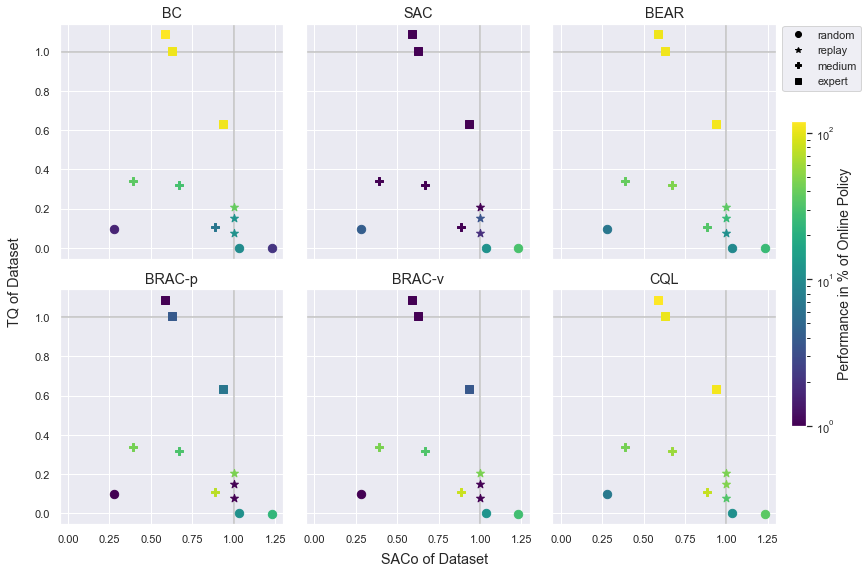

In [6]:
image_type="pdf"

from matplotlib.lines import Line2D
markers = ["o", "*", "P", "s"]
datasets = [Line2D([0], [0], color="black", marker=markers[i], linewidth=0) for i in range(len(markers))]

x_label = r"SACo of Dataset"
y_label = r"TQ of Dataset"
from matplotlib.colors import LogNorm
#normalize = Normalize(vmin=0, vmax=100, clip=True)
normalize = LogNorm(vmin=1, vmax=120, clip=True)

f, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
axs = [item for sublist in zip(axs[:, 0], axs[:, 1], axs[:, 2]) for item in sublist]

plt.xlim(xmin=-0.05, xmax=1.3)

start_ = 0

for a, algo in enumerate(algos):
    ax = axs[a]

    ax.axhline(y=1, color="silver")
    ax.axvline(x=1, color="silver")
    ax.set_title(algo, fontsize="large")

    for xp, yp, col, m in zip(sacos_[start_:], tqs[start_:], p_algos[a][start_:], dstype[start_:]):
        ax.scatter(x=xp, y=yp, c=col, s=70, cmap="viridis", norm=normalize, zorder=10, marker=m)

f.colorbar(matplotlib.cm.ScalarMappable(norm=normalize, cmap="viridis"), ax=axs, anchor=(1.3, 0.55),
           shrink=0.7).set_label(label="Performance in % of Online Policy", size=14)

f.tight_layout(rect=(0.022, 0.022, 0.91, 1))
f.legend(datasets, ["random", "replay", "medium", "expert"], loc="upper right", bbox_to_anchor=(1, 0.954))
f.text(0.5, 0.01, x_label, ha='center', fontsize="large")
f.text(0.005, 0.5, y_label, va='center', rotation='vertical', fontsize="large")
plt.savefig(os.path.join(f"d4rl_algos." + image_type))
plt.show()
plt.close()